In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('data/vehicle.csv')

In [40]:
df.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


<Axes: xlabel='Class', ylabel='count'>

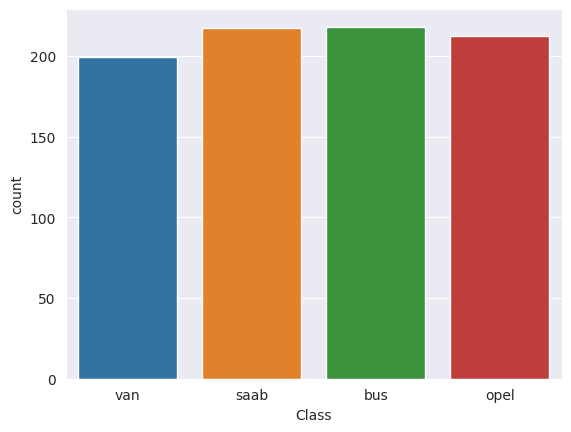

In [41]:
sns.countplot(x='Class', data=df, hue='Class')

In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
base_classifiers = [
    ('svc', SVC(random_state=42, kernel='rbf', gamma=0.1, C=100)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('gnb', GaussianNB()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], random_state=42, test_size=0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.ensemble import AdaBoostClassifier
accuracy_scores = {'svc': [], 'dt': [], 'gnb': [], 'lr': []}
for estimator in base_classifiers:
    for n_estimators in range(5, 110, 5):
        model = AdaBoostClassifier(estimator=estimator[1], random_state=42, n_estimators=n_estimators, algorithm='SAMME')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores[estimator[0]].append(accuracy_score(y_test, y_pred))

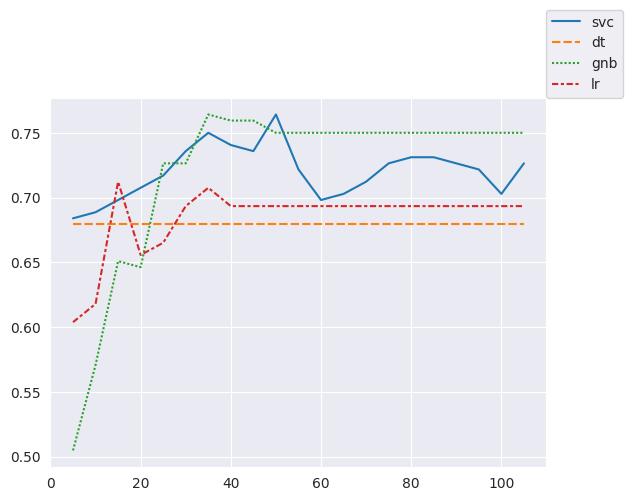

In [45]:
sns.lineplot(pd.DataFrame(accuracy_scores, index=range(5, 110, 5)))
plt.legend(loc=(1, 1))

In [47]:
for i in accuracy_scores:
    print(i, max(accuracy_scores[i]))

svc 0.7641509433962265
dt 0.6792452830188679
gnb 0.7641509433962265
lr 0.7122641509433962
